### Импортируем необходимые библиотекии

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Открываем набор данных и выводим её техническую информацию

In [2]:
df = pd.read_csv('data/anime.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


### Гистограмма
##### График имеет нормальное распределение, так как это распределение симметрично и унимодально

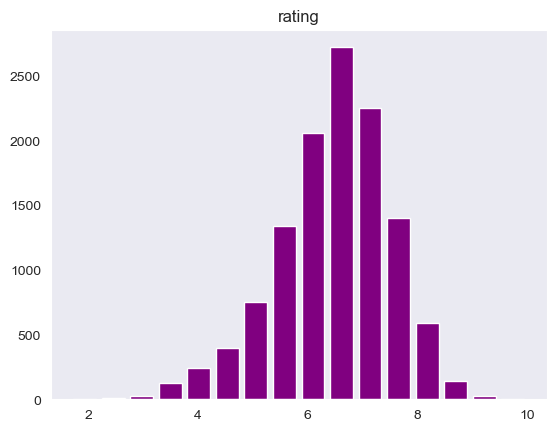

In [3]:
df.hist(column='rating', bins=16, grid=False, rwidth=.8, color='purple')
plt.show()

### Boxplot

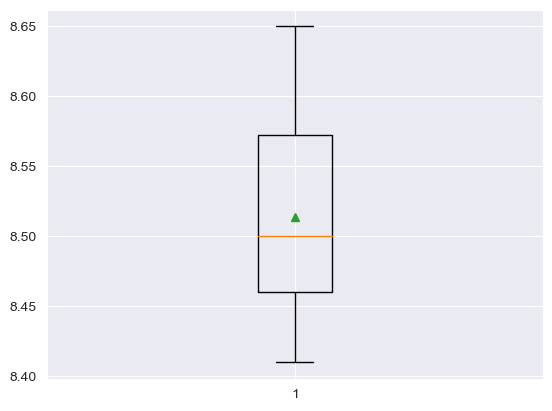

In [4]:
x = df.rating[50:150]
plt.boxplot(x, showmeans=True)
plt.show()

По гистограмме видно, что рейтинг 6 - 7.5 встречается чаще всего, а рейтинг 2 - 4.5 и 8.5 - 10 реже всего.
По boxplot видно, что в данной выборке (100 оценок) медиана равна 8.5, также видно нижний, верхний квартили, максимальное и минимальное значения. Выбросов в данной выборке нет.

### Диаграмма рассеивания

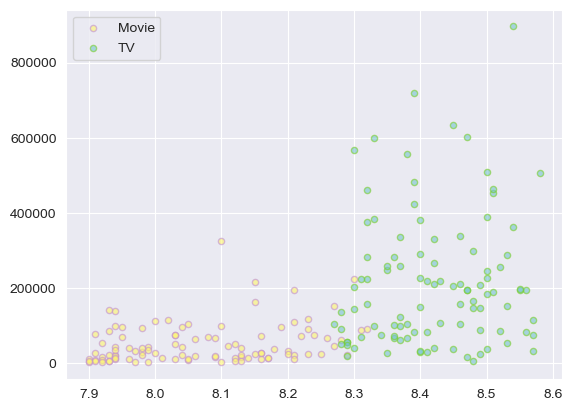

In [5]:
x1 = df[df['type'] == 'Movie']['rating'][50:150]
x2 = df[df['type'] == 'TV']['rating'][50:150]

y1 = df[df['type'] == 'Movie']['members'][50:150]
y2 = df[df['type'] == 'TV']['members'][50:150]

plt.scatter(x1, y1, 20, facecolor='#FFF66E', edgecolor='#C190CF', alpha=0.6, label='Movie')
plt.scatter(x2, y2, 20, facecolor='#78C4CF', edgecolor='#78CF2A', alpha=0.6, label='TV')
plt.legend()
plt.show()

### Гистограмма (относительно 2-ух переменных)

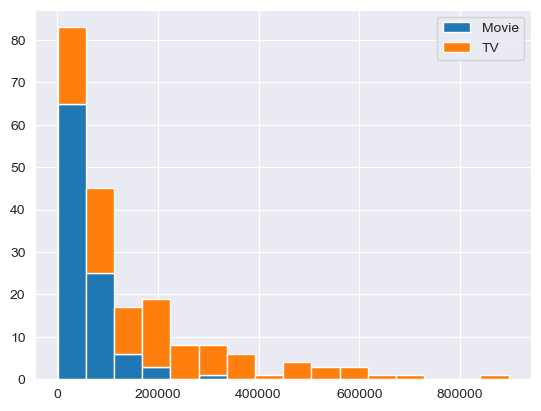

In [6]:
labels = ['Movie', 'TV']
plt.hist([y1, y2], bins=16, label=labels, stacked=True)
plt.legend()
plt.show()

### Матрица корреляций

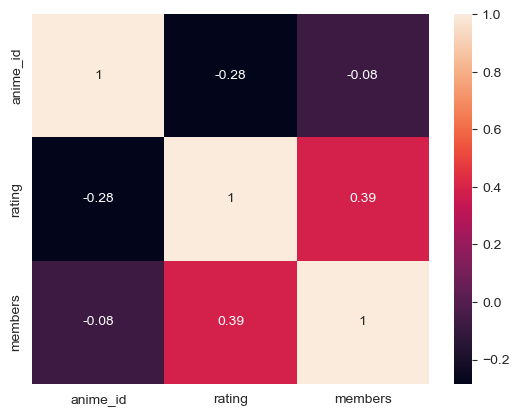

In [7]:
sns.heatmap(df.corr(), annot=True)
plt.show()

На диаграмме рассеивания видно, что у аниме с типом Movie меньше аудитория и рейтинг, чем у аниме с типом TV. (Movie: members < 200k в среднем, 7.9 < rating < 8.3; TV: members < 600k в среднем, 8.3 < rating < 8.6).
Гистограмма отражает количество аниме при определенной аудитории (видно, что количество аниме больше у типа TV, а также шире диапазон аудитории).
Матрица корреляции даёт оценку взаимосвязи между переменными. Т. о., положительная линейная корреляция между rating и members.

### Гистограмма Y относительно переменной X, где Y - непрерывная переменная, а X - категориальная переменная

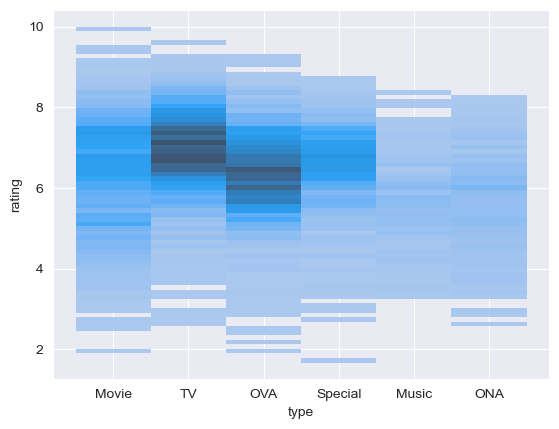

In [8]:
sns.histplot(df, x='type', y='rating')
plt.show()

### Boxplot относительно переменной Х

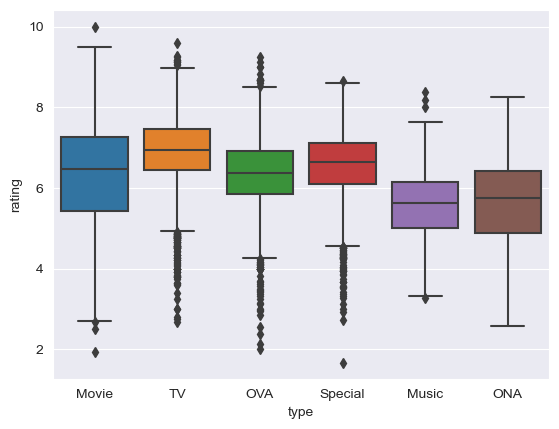

In [9]:
sns.boxplot(data=df, x='type', y='rating')
plt.show()

### Cтолбчатая диаграмма относительно переменной X

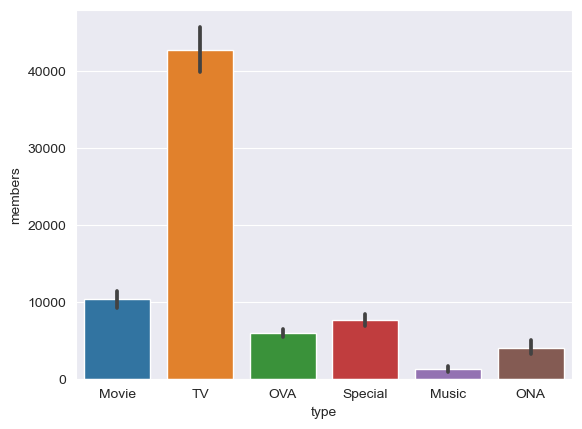

In [10]:
sns.barplot(data=df, x='type', y='members')
plt.show()

На гистограмме можно заметить, что большенство аниме с типами Movie, TV, OVA и Special имеют рейтинг от 6 до 8.
По boxplot видно, что Movie, TV, OVA и Special имеют медианное значение > 6, а другие типы < 6.
Столбачатая диаграмма отражает аудиторию по типам (наибольшая аудитория у TV ~420k, у остальных же <= 100k).

### Столбчатая диаграмма рейтинга относительно типов

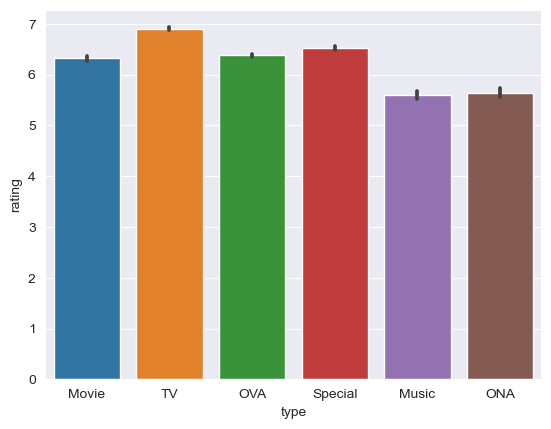

In [11]:
sns.barplot(data=df, x='type', y='rating')
plt.show()

Диаграмма отражает среднее значение рейтинга по типам.